## <p style = "background-color:orange; font-family:monospace; color:#2D2727; font-size:150%; text-align:center; border-radius:15px 15px;"> SALES PREDICTION </p>

In this notebook, we are going to load a dummy dataset of advertising and sales to make sales prediction. We will use Linear Regression and Random Forest Regression and compare the results of the two models. 

<h1> Table of Contents </h1>

1. <a href="#data">Get Data</a> </li> 
2. <a href="#eda">Data Exploration</a> </li>

3. <a href="#preprocess">Data Preprocessing</a> </li>

4. <a href="#model">Creating Model</a> </li>

    4.1. <a href="#regmodel">Linear Regression Model</a> </li>
    
    4.2. <a href="#rfmodel">Random Forest Regression Model</a> </li>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

### 1. Get Data <a name="data"></a>

* TV promotion budget (in million)
* Social Media promotion budget (in million)
* Radio promotion budget (in million)
* Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
* Sales (in million)

Dataset Link: <a href="https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data">Dummy Data HSS</a>

In [3]:
df = pd.read_csv("Dummy Data HSS.csv")

In [4]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


### 2. Data Exploration <a name="eda"></a>

In [5]:
df.shape

(4572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [7]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

Some values are missing, we are going to drop them as the number of missings is not so much.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

Checking the correlation:

In [10]:
df.corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.869158,0.527687,0.999497
Radio,0.869158,1.000000,0.606338,0.868638
Social Media,0.527687,0.606338,1.000000,0.527446
Sales,0.999497,0.868638,0.527446,1.000000


Let's see the correlation in a heatmap to make it understandable.

<AxesSubplot:>

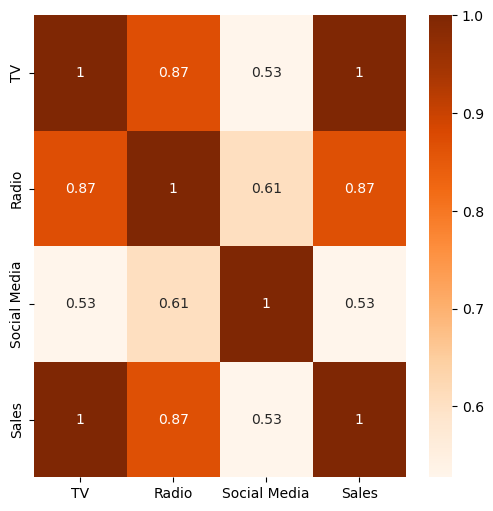

In [11]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, cmap="Oranges")

It is seen that TV budget is highly correlated with sales. After that the radio budget comes.

Let's see the influencer's effect on the sales. First, we are going to apply one hot encoder to the Influencer column.

### 3. Data Preprocessing <a name="preprocess"></a>

In [12]:
pd.get_dummies(df["Influencer"])

,Macro,Mega,Micro,Nano
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
4567,0,0,1,0
4568,0,0,0,1
4569,0,0,1,0
4570,1,0,0,0


In [13]:
onehotencoder = pd.get_dummies(df.Influencer, prefix="Influencer_")
onehotencoder

,Influencer__Macro,Influencer__Mega,Influencer__Micro,Influencer__Nano
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
4567,0,0,1,0
4568,0,0,0,1
4569,0,0,1,0
4570,1,0,0,0


Adding the one hot encoder dataframe to the main dataframe:

In [14]:
df = pd.concat([df, onehotencoder], axis=1).drop(["Influencer"], axis=1)

In [15]:
df

,TV,Radio,Social Media,Sales,Influencer__Macro,Influencer__Mega,Influencer__Micro,Influencer__Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,0,1,0
4570,71.0,17.534640,1.940873,253.610411,1,0,0,0


Checking the heatmap again to see the effect of separated influencer labels:

<AxesSubplot:>

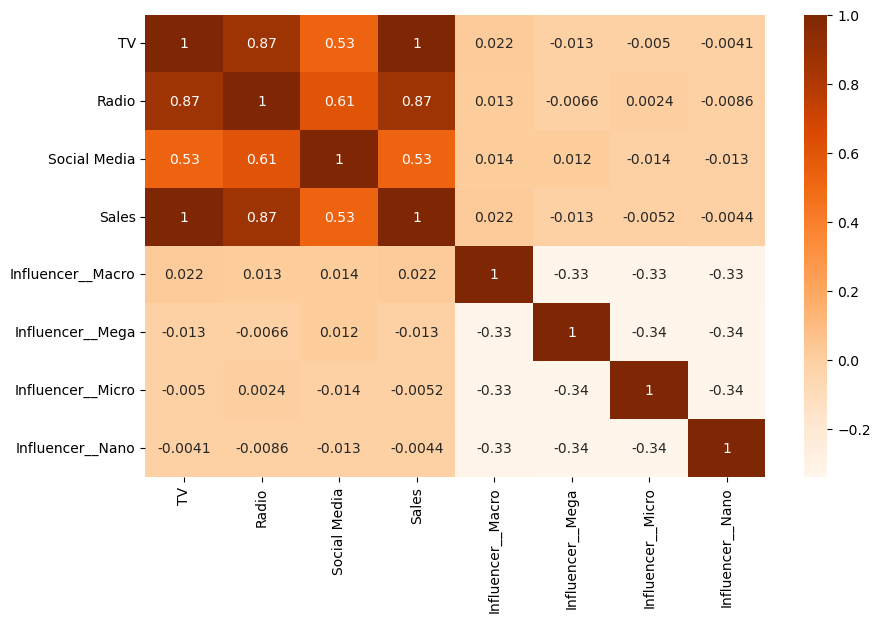

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="Oranges")

The most correlated label is the Macro influencer.

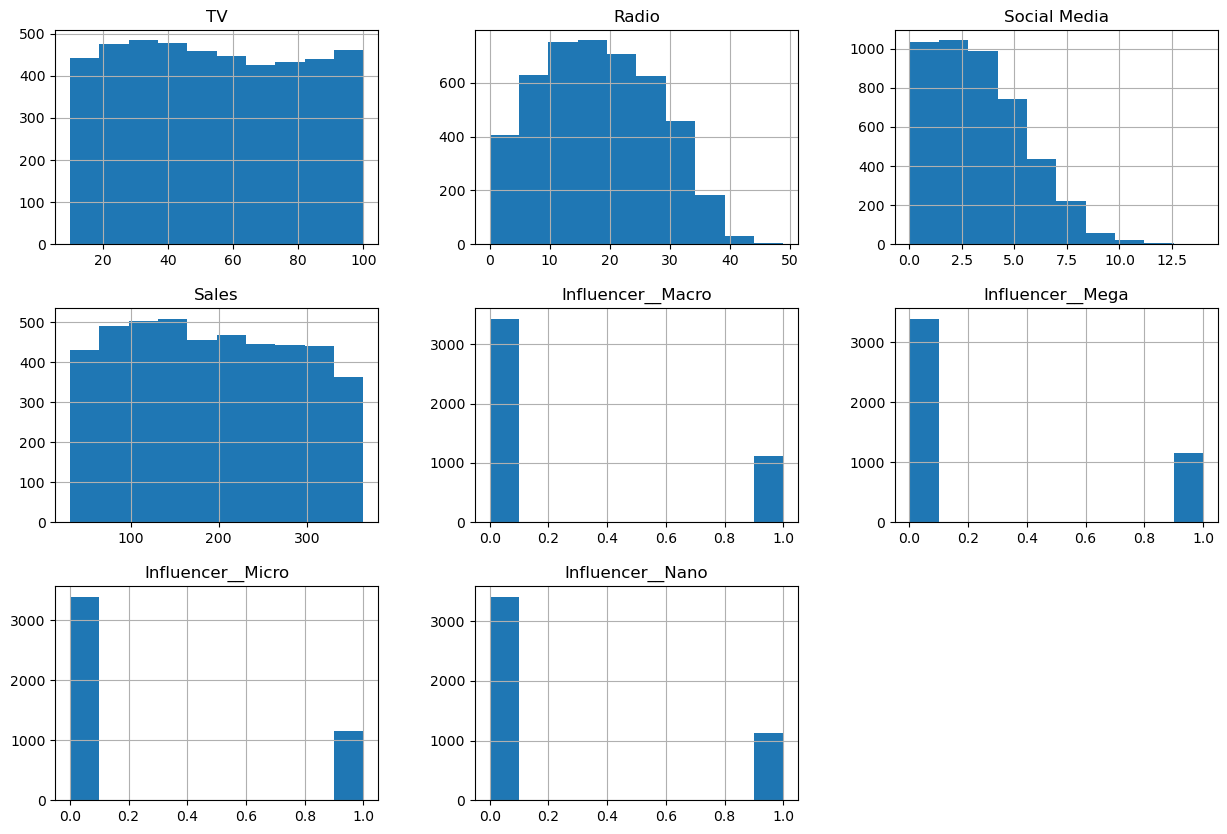

In [17]:
df.hist(figsize=(15,10));

### 4. Creating Model <a name="model"></a>

#### 4.1 Linear Regression Model <a name="regmodel"></a>

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [19]:
X = df.drop(["Sales"], axis=1)
y = df["Sales"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
regression.score(X_test, y_test)

0.9990353422423038

In [23]:
pred = regression.predict(X_test)

In [24]:
print(f"Prediction Performance: {r2_score(y_test, pred)}")
print(f"Root Mean Square Error: {mse(y_test, pred)**0.5}")

Prediction Performance: 0.9990353422423038
Root Mean Square Error: 2.882101372900342


In [25]:
print(regression.coef_, regression.intercept_)
print(df.columns)

[ 3.56290275e+00 -9.48653769e-03  2.57134316e-03  6.41141052e-02
  4.45874919e-02 -4.25308481e-02 -6.61707490e-02] -0.04594396869433126
Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer__Macro',
       'Influencer__Mega', 'Influencer__Micro', 'Influencer__Nano'],
      dtype='object')


#### 4.2 Random Forest Regression Model <a name="rfmodel"></a>

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
forest.score(X_test, y_test)

0.9986912888005387

In [28]:
pred_r = forest.predict(X_test)

In [29]:
print(f"Prediction Performance: {r2_score(y_test, pred_r)}")
print(f"Root Mean Square Error: {mse(y_test, pred_r)**0.5}")

Prediction Performance: 0.9986912888005387
Root Mean Square Error: 3.356947360039444


Although the results are very close, Linear Regression Model gives the best result for this dataset.